डेटासेटचे दृश्यांकन करा


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
birds = pd.read_csv('../../../data/birds.csv')
birds.head()

Name          ScientificName  \
0  Black-bellied whistling-duck  Dendrocygna autumnalis   
1        Fulvous whistling-duck     Dendrocygna bicolor   
2                    Snow goose      Anser caerulescens   
3                  Ross's goose            Anser rossii   
4   Greater white-fronted goose         Anser albifrons   

                Category         Order    Family        Genus  \
0  Ducks/Geese/Waterfowl  Anseriformes  Anatidae  Dendrocygna   
1  Ducks/Geese/Waterfowl  Anseriformes  Anatidae  Dendrocygna   
2  Ducks/Geese/Waterfowl  Anseriformes  Anatidae        Anser   
3  Ducks/Geese/Waterfowl  Anseriformes  Anatidae        Anser   
4  Ducks/Geese/Waterfowl  Anseriformes  Anatidae        Anser   

  ConservationStatus  MinLength  MaxLength  MinBodyMass  MaxBodyMass  \
0                 LC       47.0       56.0        652.0       1020.0   
1                 LC       45.0       53.0        712.0       1050.0   
2                 LC       64.0       79.0       2050.0       4050.0   
3                 LC       57.3       64.0       1066.0       1567.0   
4                 LC       64.0       81.0       1930.0       3310.0   

   MinWingspan  MaxWingspan  
0         76.0         94.0  
1         85.0         93.0  
2        135.0        165.0  
3        113.0        116.0  
4        130.0        165.0

MaxBodyMass डेटाचे हिस्टोग्राम दाखवा


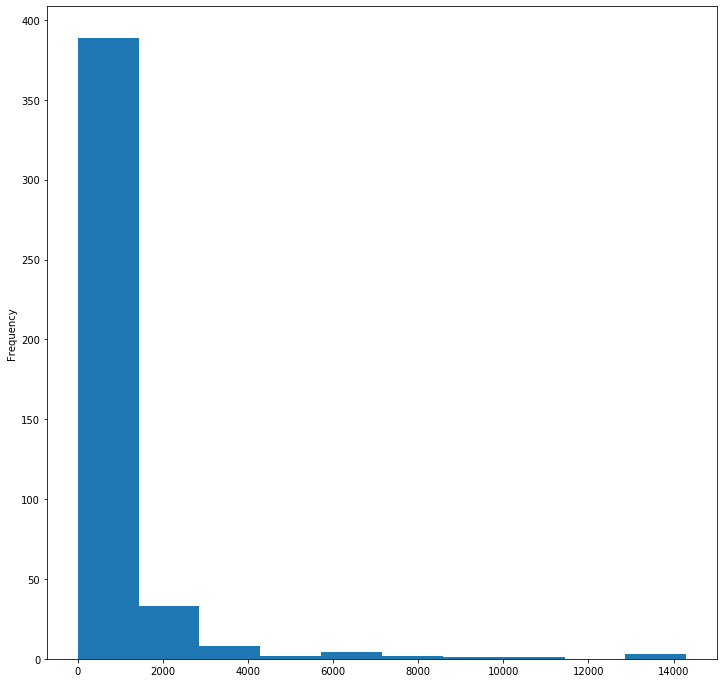

In [4]:
birds['MaxBodyMass'].plot(kind = 'hist',bins = 10,figsize = (12,12))
plt.show()

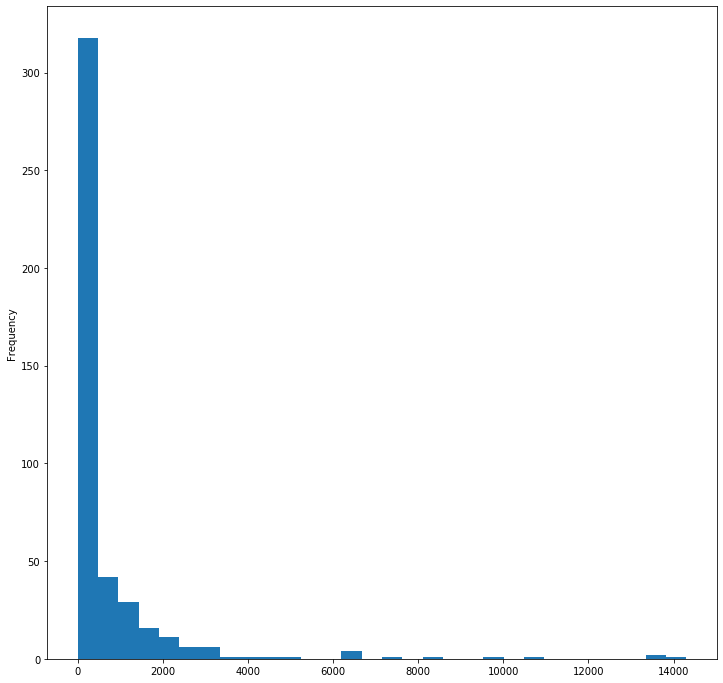

In [5]:
birds['MaxBodyMass'].plot(kind = 'hist',bins = 30,figsize = (12,12))
plt.show()

डेटा फिल्टर करा आणि नवीन हिस्टोग्राम तयार करा


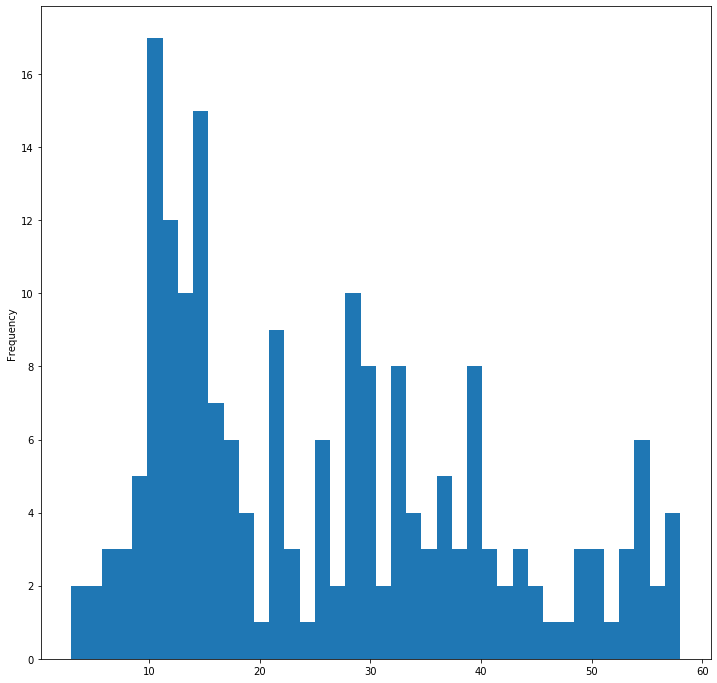

In [6]:
filteredBirds = birds[(birds['MaxBodyMass'] > 1) & (birds['MaxBodyMass'] < 60)]      
filteredBirds['MaxBodyMass'].plot(kind = 'hist',bins = 40,figsize = (12,12))
plt.show()        


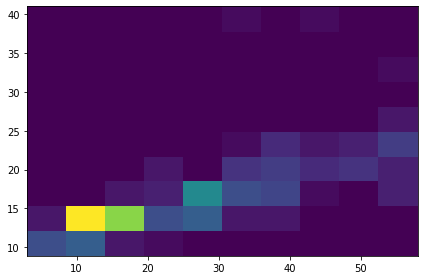

In [7]:
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

x = filteredBirds['MaxBodyMass']
y = filteredBirds['MaxLength']

fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist2d(x, y)

फिल्टर केलेल्या डेटासेटसह काम करताना, ConservationStatus आणि MaxBodyMass यांना एकत्रित करून लेबल केलेला आणि स्टॅक केलेला हिस्टोग्राम तयार करा


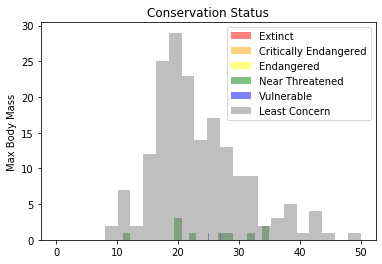

In [8]:
x1 = filteredBirds.loc[filteredBirds.ConservationStatus=='EX', 'MinWingspan']
x2 = filteredBirds.loc[filteredBirds.ConservationStatus=='CR', 'MinWingspan']
x3 = filteredBirds.loc[filteredBirds.ConservationStatus=='EN', 'MinWingspan']
x4 = filteredBirds.loc[filteredBirds.ConservationStatus=='NT', 'MinWingspan']
x5 = filteredBirds.loc[filteredBirds.ConservationStatus=='VU', 'MinWingspan']
x6 = filteredBirds.loc[filteredBirds.ConservationStatus=='LC', 'MinWingspan']

kwargs = dict(alpha=0.5, bins=20)

plt.hist(x1, **kwargs, color='red', label='Extinct')
plt.hist(x2, **kwargs, color='orange', label='Critically Endangered')
plt.hist(x3, **kwargs, color='yellow', label='Endangered')
plt.hist(x4, **kwargs, color='green', label='Near Threatened')
plt.hist(x5, **kwargs, color='blue', label='Vulnerable')
plt.hist(x6, **kwargs, color='gray', label='Least Concern')

plt.gca().set(title='Conservation Status', ylabel='Max Body Mass')
plt.legend();

Seaborn सह कार्य करताना, MinWingspan बद्दल एक गुळगुळीत प्लॉट तयार करा


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


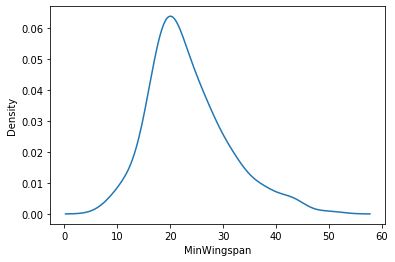

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(filteredBirds['MinWingspan'])
plt.show()

MaxBodyMass बद्दल kdeplot वापरून पहा


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


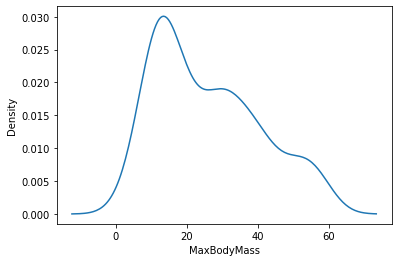

In [11]:
sns.kdeplot(filteredBirds['MaxBodyMass'])
plt.show()

प्लॉट स्मूथिंग पॅरामीटरसह प्रयोग करा


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


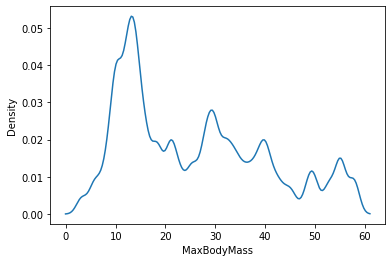

In [12]:
sns.kdeplot(filteredBirds['MaxBodyMass'], bw_adjust=.2)
plt.show()

MinLength आणि MaxLength यांची तुलना करणारा 2D kdeplot तयार करा, ज्यामध्ये ConservationStatus दर्शविण्यासाठी hue आहे


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:1078: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


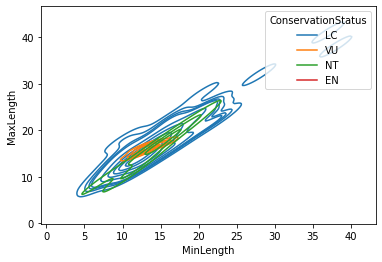

In [13]:
sns.kdeplot(data=filteredBirds, x="MinLength", y="MaxLength", hue="ConservationStatus")



---

**अस्वीकरण**:  
हा दस्तऐवज AI भाषांतर सेवा [Co-op Translator](https://github.com/Azure/co-op-translator) वापरून भाषांतरित करण्यात आला आहे. आम्ही अचूकतेसाठी प्रयत्नशील असलो तरी, कृपया लक्षात ठेवा की स्वयंचलित भाषांतरांमध्ये त्रुटी किंवा अचूकतेचा अभाव असू शकतो. मूळ भाषेतील दस्तऐवज हा अधिकृत स्रोत मानला जावा. महत्त्वाच्या माहितीसाठी, व्यावसायिक मानवी भाषांतराची शिफारस केली जाते. या भाषांतराचा वापर करून उद्भवलेल्या कोणत्याही गैरसमज किंवा चुकीच्या अर्थासाठी आम्ही जबाबदार राहणार नाही.
